In [1]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import TensorBoard
# from tensorflow.keras.callbacks import TensorBoard
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import pickle

Using TensorFlow backend.


In [2]:
input_img = Input(shape=(28, 28, 1))    # adapt this if using 'channels_first' image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [3]:
# at this point the representation is (4, 4, 8), i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

In [8]:
# To train it, use the original MNIST digits with shape (samples, 3, 28, 28),
# and just normalize pixel values between 0 and 1

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))    # adapt this if using 'channels_first' image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))       # adapt this if using 'channels_first' image data format

# open a terminal and start TensorBoard to read logs in the autoencoder subdirectory
# tensorboard --logdir=autoencoder
# tbCallBack = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test, x_test), verbose=2)
print(" .. MODEL FITTING DONE ..")

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 12s - loss: 0.2118 - val_loss: 0.1653
Epoch 2/50
 - 10s - loss: 0.1523 - val_loss: 0.1391
Epoch 3/50
 - 8s - loss: 0.1389 - val_loss: 0.1304
Epoch 4/50
 - 7s - loss: 0.1321 - val_loss: 0.1305
Epoch 5/50
 - 9s - loss: 0.1277 - val_loss: 0.1248
Epoch 6/50
 - 11s - loss: 0.1244 - val_loss: 0.1195
Epoch 7/50
 - 7s - loss: 0.1216 - val_loss: 0.1211
Epoch 8/50
 - 7s - loss: 0.1194 - val_loss: 0.1162
Epoch 9/50
 - 8s - loss: 0.1173 - val_loss: 0.1180
Epoch 10/50
 - 9s - loss: 0.1158 - val_loss: 0.1151
Epoch 11/50
 - 8s - loss: 0.1144 - val_loss: 0.1117
Epoch 12/50
 - 8s - loss: 0.1129 - val_loss: 0.1115
Epoch 13/50
 - 8s - loss: 0.1118 - val_loss: 0.1096
Epoch 14/50
 - 8s - loss: 0.1114 - val_loss: 0.1077
Epoch 15/50
 - 8s - loss: 0.1105 - val_loss: 0.1082
Epoch 16/50
 - 10s - loss: 0.1094 - val_loss: 0.1068
Epoch 17/50
 - 10s - loss: 0.1088 - val_loss: 0.1091
Epoch 18/50
 - 9s - loss: 0.1085 - val_loss: 0.1072
Epoch 19/50
 - 8s 

In [9]:
# take a look at the reconstructed digits
decoded_imgs = autoencoder.predict(x_test)

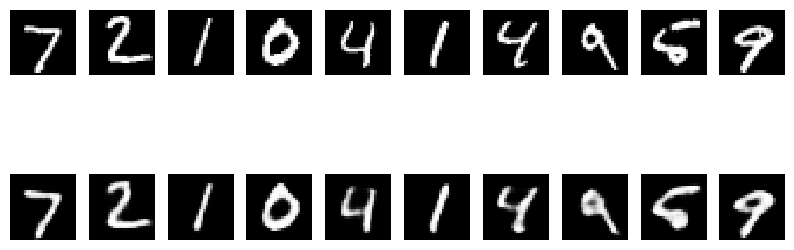

In [10]:
n = 10
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

plt.show()

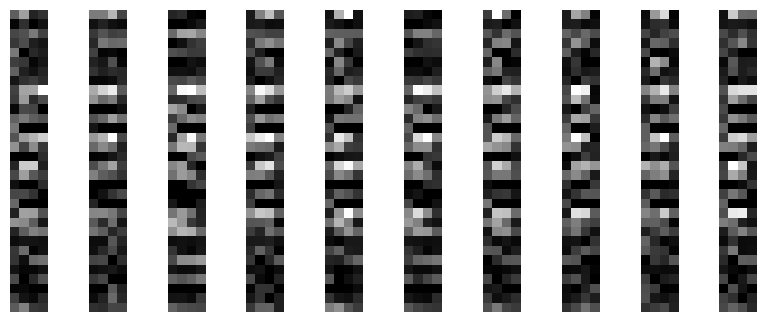

In [11]:
# take a look at the 128-dimensional encoded representation
# these representations are 8x4x4, so we reshape them to 4x32 in order to be able to display them as grayscale images

encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

# save latent space features 128-d vector
pickle.dump(encoded_imgs, open('conv_autoe_features.pickle', 'wb'))

n = 10
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.set_axis_off()

plt.show()

K.clear_session()